In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df= pd.read_csv("loan_final.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
n_rows, n_columns = df.shape
print('number of rows', n_rows)
print('number of columns', n_columns)


number of rows 4269
number of columns 13


In [7]:
#Get count of number of M or B cells in diagnosis
df['status'].value_counts()

 Approved    2656
 Rejected    1613
Name: status, dtype: int64

# Plotting the dataset Approved and Rejected

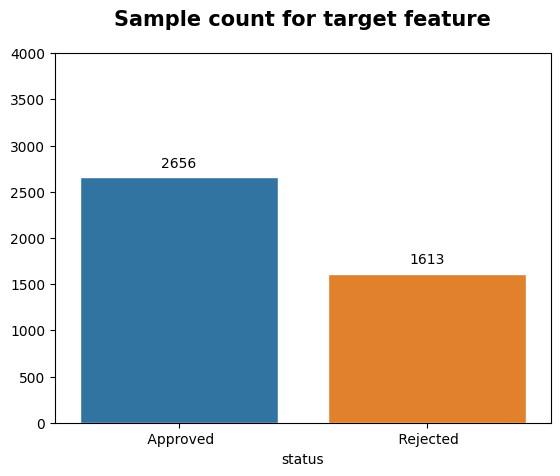

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= "status",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 4000)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for preprocessing
loan_data_preprocessed = df.copy()

# Initialize label encoders for categorical variables
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_status = LabelEncoder()

# Encode categorical variables
loan_data_preprocessed[' education'] = le_education.fit_transform(loan_data_preprocessed[' education'])
loan_data_preprocessed[' self_employed'] = le_self_employed.fit_transform(loan_data_preprocessed[' self_employed'])
loan_data_preprocessed['status'] = le_status.fit_transform(loan_data_preprocessed['status'])


In [10]:
loan_data_preprocessed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [11]:
X= loan_data_preprocessed.drop(["loan_id", "status"], axis= "columns")

In [12]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [13]:
X.shape

(4269, 11)

In [14]:
Y= loan_data_preprocessed["status"]

Y.head()

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [15]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [16]:
Y.shape

(4269,)

# Preprocessing
### 1. Split into train test
### 2. Standardization

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.2, random_state= 42)

In [18]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [19]:
X_test_scaled

array([[ 1.51250774, -0.99736803, -1.01504731, ...,  1.15447134,
         0.05627784,  0.72735662],
       [-0.25599737, -0.99736803, -1.01504731, ...,  1.04007205,
         0.28522978,  0.54176071],
       [ 0.33350433, -0.99736803, -1.01504731, ...,  2.57302245,
         1.45179448,  0.51082806],
       ...,
       [ 1.51250774,  1.00263891,  0.98517575, ...,  0.49095549,
        -0.37982112,  0.88201987],
       [ 0.92300603,  1.00263891, -1.01504731, ..., -0.83607619,
        -1.0121646 , -1.09766982],
       [-0.84549907,  1.00263891, -1.01504731, ...,  0.14775765,
        -0.59787059, -0.97393921]])

In [20]:
X_test_scaled[0]

array([ 1.51250774, -0.99736803, -1.01504731,  0.12027804,  0.49939915,
        1.58742291, -1.02962329, -0.14839795,  1.15447134,  0.05627784,
        0.72735662])

In [21]:
test_array = np.array(Y_test)
print(test_array)

[1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 

In [22]:
 test_array[0]

1

# StratifiedKFold for Imbalanced Dataset

# Before parameter tuning

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [26]:
predictions = model.predict(X_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, predictions)
classification_report = classification_report(Y_test, predictions)
confusion_matrix = confusion_matrix(Y_test, predictions)

In [28]:
print(accuracy)

0.905152224824356


In [29]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [30]:
confusion_matrix

array([[498,  38],
       [ 43, 275]])

AUC: 0.9369599543655606


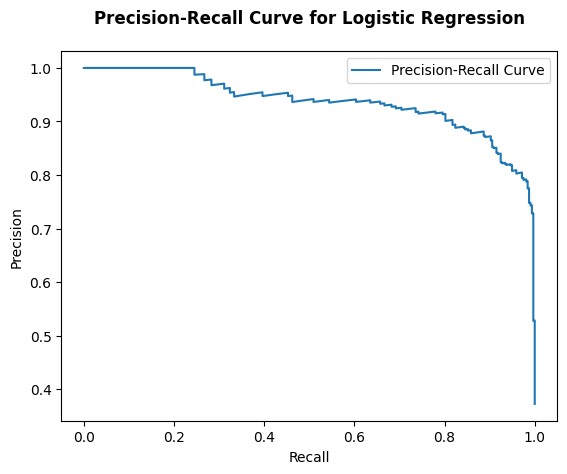

In [31]:
from sklearn.metrics import precision_recall_curve, auc
# Obtain predicted probabilities for the positive class
Y_proba = model.predict_proba(X_test_scaled)[:, 1]
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
# Plot the precision-recall curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression',pad= 20, fontweight= "bold")
plt.legend()
plt.show()

## Before parameter tuning accuracy= 0.9051

# Hyper parameter tuning using GridSearchCV

In [44]:
# Hyper parameter tuning and cross validation for the Logistic Regression model

from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(LogisticRegression(max_iter=1000), {
    'C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'] 
}, cv=5, return_train_score=False)

grid.fit(X_train_scaled,Y_train)
grid = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)
grid[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']].tail(20)

,param_C,param_penalty,param_solver,mean_test_score,rank_test_score
42,10,l1,newton-cg,NaN,36
51,100,l1,newton-cholesky,NaN,36
50,100,l1,newton-cg,NaN,36
48,100,l1,lbfgs,NaN,36
0,0.01,l1,lbfgs,NaN,36
35,2,l1,newton-cholesky,NaN,36
34,2,l1,newton-cg,NaN,36
32,2,l1,lbfgs,NaN,36
26,1,l1,newton-cg,NaN,36
24,1,l1,lbfgs,NaN,36


In [45]:
grid[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']].tail(50)

,param_C,param_penalty,param_solver,mean_test_score,rank_test_score
12,0.1,l2,lbfgs,0.919180,6
14,0.1,l2,newton-cg,0.919180,6
25,1,l1,liblinear,0.918887,9
37,2,l2,liblinear,0.918594,10
17,0.5,l1,liblinear,0.918594,10
31,1,l2,newton-cholesky,0.918594,10
30,1,l2,newton-cg,0.918594,10
28,1,l2,lbfgs,0.918594,10
44,10,l2,lbfgs,0.918302,15
55,100,l2,newton-cholesky,0.918302,15


## Best parameters were C=0.01, penalty='l1', solver='liblinear'

In [33]:
# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=1000)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#  X, Y are feature and target variables

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=1, penalty='l2', solver='newton-cg', max_iter=100)
LR_best.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_pred = LR_best.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

#print accuracy
accuracy_tuning = accuracy_score(Y_test, Y_pred)
print(accuracy_tuning)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[498  38]
 [ 43 275]]
0.905152224824356
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



# After parameter tuning accuracy = 0.934

# Confusion Matrix

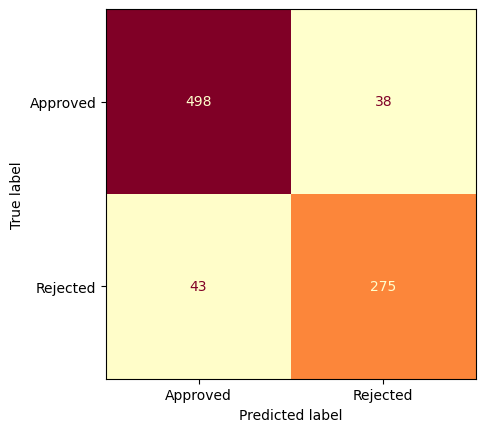

In [63]:
# Visualize the confusion matrix
category=['Approved', 'Rejected']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category)
disp = disp.plot(cmap=plt.cm.YlOrRd, colorbar=False)
plt.show()

<!-- True Positives (TP): The upper left cell shows the number of correct predictions that an instance is positive, in this case, 70. This means that 70 benign cases were correctly identified by the model.

True Negatives (TN): The lower right cell shows the number of correct predictions that an instance is negative, here being 42. This means that 42 malignant cases were correctly identified.

False Positives (FP): The upper right cell shows the number of incorrect predictions that an instance is positive, which is 1. This represents a case that was actually malignant but was incorrectly predicted as benign by the model.

False Negatives (FN): The lower left cell shows the number of incorrect predictions that an instance is negative, also 1 in this matrix. This represents a case that was actually benign but was incorrectly predicted as malignant. -->

# AUC this is gives the measure of the model independent to the threshold used for classification

AUC: 0.937013710486511


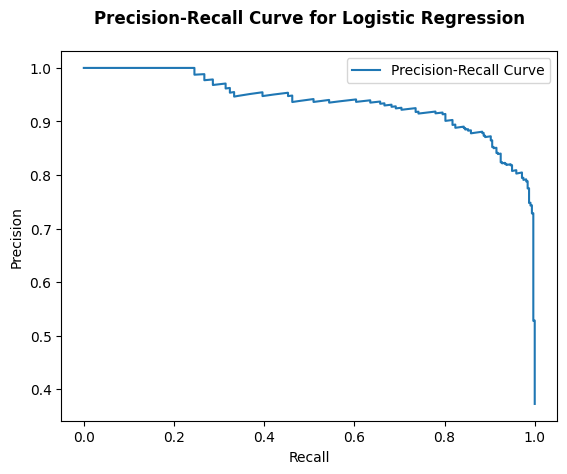

In [64]:
from sklearn.metrics import precision_recall_curve, auc
# Obtain predicted probabilities for the positive class
Y_proba = LR_best.predict_proba(X_test_scaled)[:, 1]
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
# Plot the precision-recall curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression',pad= 20, fontweight= "bold")
plt.legend()
plt.show()

# WHICH ARE INCORRECT PREDICTION?

In [65]:
incorrect_predictions = X_test[Y_test != Y_pred]
print("Incorrect predictions:", incorrect_predictions)

Incorrect predictions:        no_of_dependents   education   self_employed   income_annum  \
296                   5           1               1        8600000   
1130                  1           1               0         300000   
3402                  3           1               1        9200000   
3624                  1           1               1         800000   
3490                  1           0               0        4700000   
...                 ...         ...             ...            ...   
2517                  5           0               1        2100000   
1017                  1           1               1        2500000   
1288                  3           1               0        5900000   
1539                  4           1               1        1500000   
1114                  1           1               0        2900000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
296       28900000           8           516                 

In [66]:
incorrect_predictions.shape

(81, 11)

# Cross Validation

# Graphical visualization of cross validation for each fold

In [67]:
# Reset the indices of the training and test sets
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Overall High Accuracy: The accuracies for both training and validation are high, indicating a well-performing model overall.

Stable Training Accuracy: The training accuracy does not show significant changes across the folds, which suggests the model is stable with respect to the data it is trained on.

Validation Accuracy Variance: The drop in validation accuracy on the third fold may indicate that the model did not perform as well on that particular subset of the data. This could be due to several reasons, such as:

The validation subset in the third fold could be inherently more difficult to predict.
The validation subset could contain outliers or features that are not as well represented in the training data.
Recovery in Validation Accuracy: The increase in validation accuracy in the fourth and fifth folds suggests that the issue observed in the third fold does not persist with different subsets of the data, indicating that the model is capable of recovering and generalizing from fold to fold.

No Clear Signs of Overfitting: Since the training accuracy does not exhibit a peak or significant drop at the point where the validation accuracy dips, it does not necessarily indicate overfitting. Overfitting is usually suggested by a high training accuracy accompanied by a low validation accuracy, which is not consistently observed here.

In [68]:
# Ensure X_train_scaled and Y_train have the same length
print("Length of X_train_scaled:", len(X_train_scaled))
print("Length of Y_train:", len(Y_train))

Length of X_train_scaled: 3415
Length of Y_train: 3415


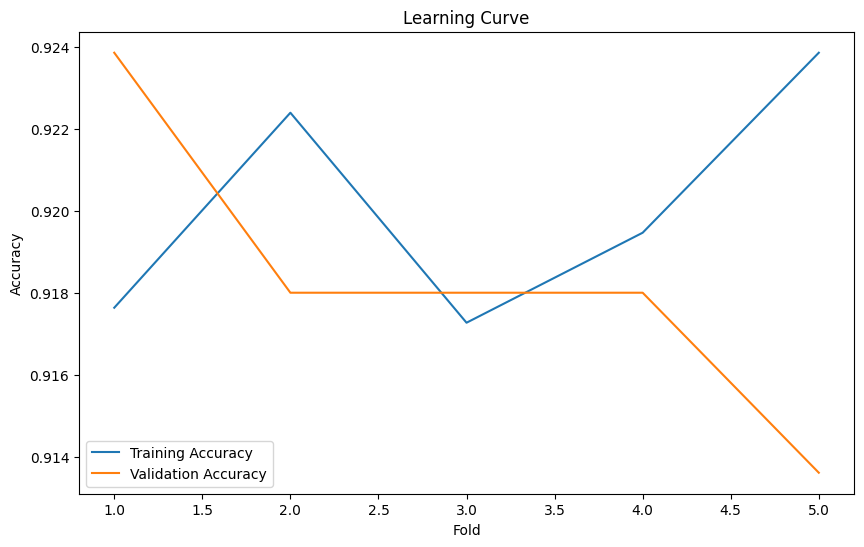

Confusion Matrix:
 [[1980  140]
 [ 138 1157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2120
           1       0.89      0.89      0.89      1295

    accuracy                           0.92      3415
   macro avg       0.91      0.91      0.91      3415
weighted avg       0.92      0.92      0.92      3415



In [69]:
# Initialize KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(X_train_scaled):
    # Create training and validation subsets
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train the Logistic Regression model
    LR_best.fit(X_train_fold, Y_train_fold)

    # Calculate training and validation accuracy
    train_accuracy = LR_best.score(X_train_fold, Y_train_fold)
    val_accuracy = LR_best.score(X_val_fold, Y_val_fold)

    # Store the results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(1, 6), val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the training set using cross-validation
Y_pred_cv = cross_val_predict(LR_best, X_train_scaled, Y_train, cv=5)  # Adjust cv as needed

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(Y_train, Y_pred_cv)
print("Classification Report:\n", class_report)


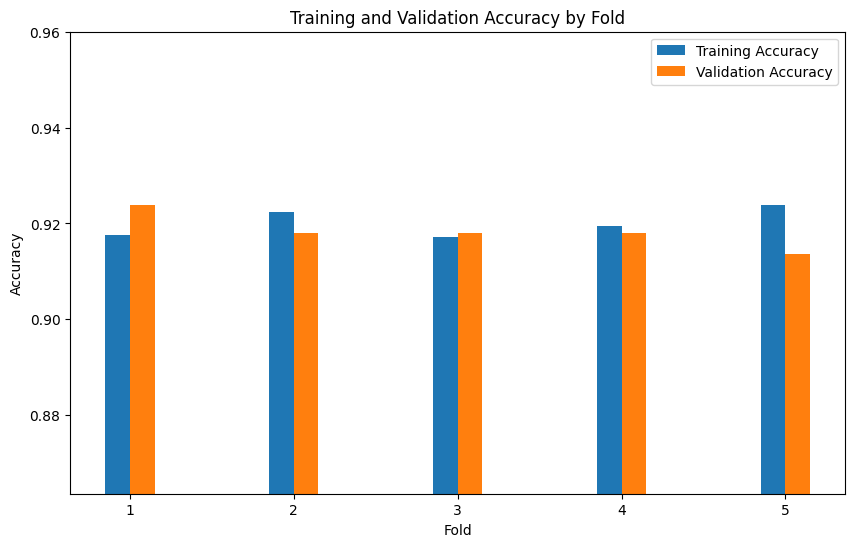

In [61]:

# Assuming train_accuracies and val_accuracies are filled as before
folds = np.arange(1, 6)  # Folds ranging from 1 to 5

# Calculate the minimum and maximum accuracy values across both training and validation accuracies
min_accuracy = min(min(train_accuracies), min(val_accuracies))
max_accuracy = max(max(train_accuracies), max(val_accuracies))

# Expand the range slightly to ensure all bars are comfortably within the plot area
min_lim = max(0, min_accuracy - 0.05)  # Ensure minimum is not less than 0
max_lim = min(0.96, max_accuracy + 0.05)  # Ensure maximum is not more than 1

plt.figure(figsize=(10, 6))

# Adjust the width for clarity
width = 0.15

# Plotting both the training and validation accuracies as bar charts
plt.bar(folds - width/2, train_accuracies, width, label='Training Accuracy')
plt.bar(folds + width/2, val_accuracies, width, label='Validation Accuracy')

# Setting the y-axis to focus on the range of interest
plt.ylim([min_lim, max_lim])

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Fold')
plt.xticks(folds)

# Adding a legend
plt.legend(loc='best')

plt.show()